In [2]:
import math
import matplotlib.pyplot as plt
import mpmath as mpmath
from random import randrange
import IPython.display as ipd

In [2]:
def bake():
    bake = []
    for current in range(1,2**10):
        bake.append([])
        for last in range(1,2**10):
            bake[current-1].append(solve(current/2**10,last/2**10))
    print(bake[0:2])

In [13]:
class CrashSampler():
    
    
    audio_clock_rate = 48000.0
    clock_freq = 12000.0
    input_effect_ratio = (4.994520 - 5.667248) / 15.0
    freq = 111.1111
    omega = freq*2.0*math.pi/audio_clock_rate
    print(omega * 2**13)
    print("cosomega",math.cos(omega) * 2 ** 7)
    dampening_per_wave = 1 / 1.3

    dampening_per_sample = dampening_per_wave**(1/(audio_clock_rate/freq))
    print(dampening_per_sample*2**6)
    print(dampening_per_wave**(audio_clock_rate/197))
    last = 0.0
    current = 0.0
    
    inp = 0.0
    
    
    
    def generate_wave_file(self):
        file = open("crash.csv","w")
        file.write("value\n")
        self.inp = 0.0
        
        outputs = []
        for time in range(int(self.audio_clock_rate*2)):
            should_update_input = time < self.audio_clock_rate and time % 4 == 0
            
            input_change = 0
            if should_update_input:
                input_change = self.get_input_change(time)
            
            self._next_sample(input_change)

            if(self.current < -5):
                outputs.append(-5)
            else:
                outputs.append(self.current)
            file.write(str(self.current)+"\n")
        self.plot_wave(outputs)
        return outputs
        
    def plot_wave(self, outputs):
        plt.figure(figsize=(15, 10))
        plt.plot(outputs)
        plt.show()

    def get_input_change(self, time):
        new_inp = int(16.0 * (self.clock_freq - time/4.0) / self.clock_freq * float(randrange(2)))
        change = float(self.inp-new_inp) * self.input_effect_ratio
        self.inp = new_inp
        return change
        
    def get_next_sample(self, input_change):
        raise NotImplementedError()
        
    
    
class AmplitudePhaseSolvingCrashSampler(CrashSampler):
    phase = 0.0
    amplitude = 0.0    
    
    def _next_sample(self, change):        
        if change != 0:
            self.current = math.sin(self.phase+self.omega) * self.amplitude + change
            self.solve()
                
        self.amplitude = self.amplitude * self.dampening_per_sample
        self.phase += self.omega
        self.current = math.sin(self.phase) * self.amplitude
        self.last = self.current
    
    def solve(self):
        delta = self.current-self.last
        self.phase = math.atan((self.last+self.current)/delta * math.tan(self.omega/2)) - self.omega/2 + math.pi
        self.amplitude = -((self.last-self.current)*mpmath.sec((self.omega/2)+self.phase))/self.omega

class LineContinuingCrashSampler(CrashSampler):
    def _next_sample(self, change):        
        if change != 0:
            would_be = (2.0*math.cos(self.omega)*self.current-self.last)
            self.last = self.current * self.dampening_per_sample
            self.current = change + would_be * self.dampening_per_sample    
        else:
            temp = self.current
            self.current = (2*math.cos(self.omega)*self.current-self.last) * self.dampening_per_sample
            self.last = temp * self.dampening_per_sample
            


119.14779835469852
cosomega 127.98646168937738
63.96114302455914
1.7264449602286072e-28


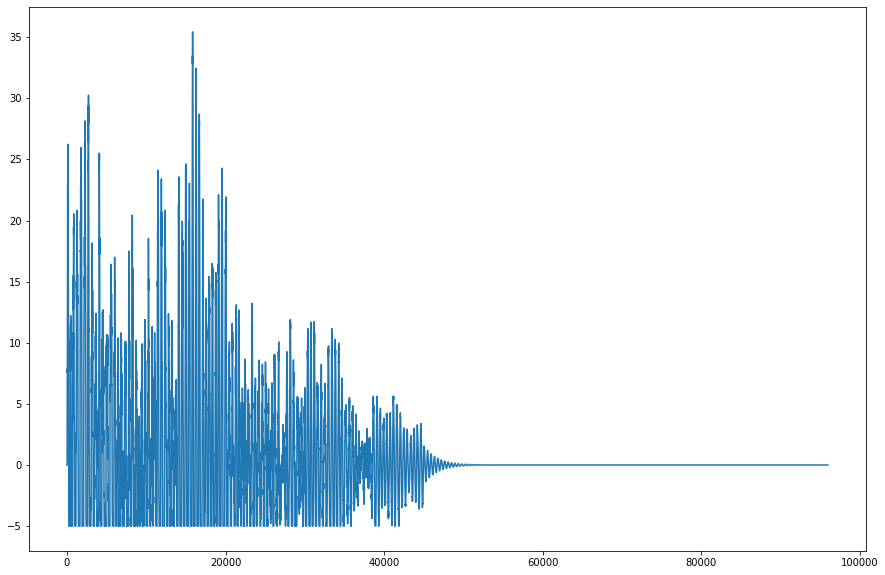

In [26]:
line_continueing_sampler = LineContinuingCrashSampler()
ipd.Audio(line_continueing_sampler.generate_wave_file(), rate=line_continueing_sampler.audio_clock_rate)

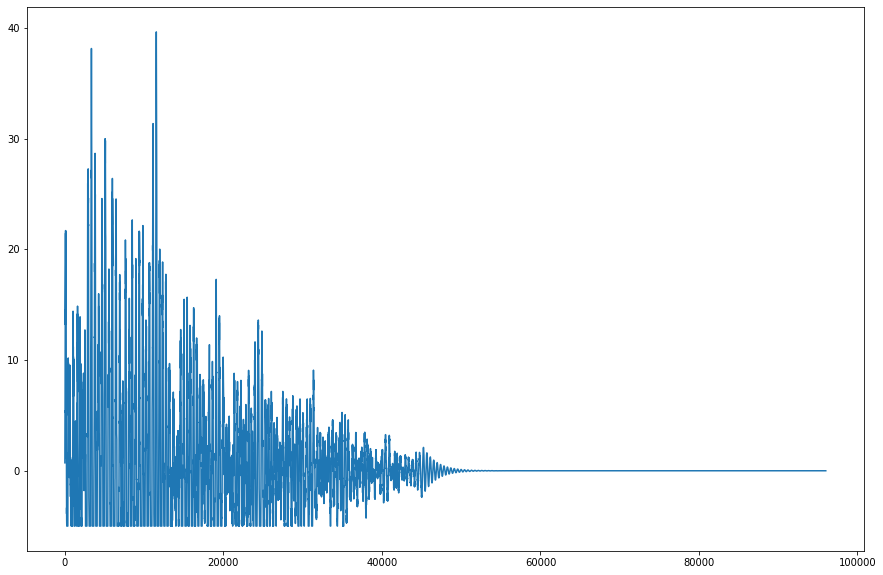

In [25]:
amplitude_phase_continueing_sampler = AmplitudePhaseSolvingCrashSampler()
ipd.Audio(amplitude_phase_continueing_sampler.generate_wave_file(), rate=amplitude_phase_continueing_sampler.audio_clock_rate)

In [7]:
sample_rate = 48000
samples = [0]

sample_num = 0
direction = 1
for x in range(sample_rate*8):
    freq = -900*math.tanh(900*(x/sample_rate)/1600) + 600+900
    wave_length_samples = sample_rate/freq
#     print(wave_length_samples, sample_num, direction, freq, samples[-1])
    
    if sample_num > wave_length_samples/2:
        direction = direction * -1
        sample_num = sample_num - wave_length_samples/2
    else:
        sample_num += 1
    samples.append(direction * 1.25)

    
from scipy import signal

b, a = signal.butter(4, 0.125, btype='low', output='ba')

low_data = signal.lfilter(b, a, samples)
    

ipd.Audio(low_data, rate=48000)
# plt.figure(figsize=(15, 10))
# plt.plot(samnples)
# plt.show()
# samples

In [48]:
# Using readlines()
import re

file1 = open('squeal_samples.txt', 'r')
samples = [int(math.floor(float(num) * 28494)) for i, num in enumerate(file1.readlines()) if i % 8 == 0 and i < 36000 * 8]

ipd.Audio(samples, rate=48000)

hex_samples = " ".join([h[0:2] + " " + h[2:4] for h in [f"{s:0{4}x}" for s in samples]])

hex_samples_16 = re.sub("(.{48})", "\\1\n", hex_samples, 0, re.DOTALL)

print(hex_samples_16)

00 00 00 00 00 00 00 04 01 2c 08 59 12 62 1c de 
27 3f 31 5b 3b 20 44 87 4d 8f 56 39 5e 85 66 78 
6e 12 75 58 7c 4d 82 f3 89 4e 8f 61 95 2f 9a bb 
a0 08 a5 17 a9 ed ae 8b b2 f5 b7 2b ae 8a a0 e8 
94 24 88 32 7d 03 72 8d 68 c3 5f 9b 57 0c 4f 0b 
47 90 40 93 40 fa 4a 26 52 f4 5b 64 63 78 6b 34 
72 9a 79 ad 80 71 86 e9 8d 17 92 ff 98 a4 9e 08 
a3 2f a8 1b ac ce b1 4b b5 95 b3 dc a5 e3 98 ce 
8c 8f 81 19 76 5f 6c 56 62 f3 5a 2c 51 f7 4a 4b 
43 20 3d 6d 46 be 4f af 58 42 60 78 68 55 6f db 
77 0d 7d ef 84 82 8a cc 90 ce 96 8c 9c 08 a1 46 
a6 47 ab 0f af a1 b3 fe b8 28 ab 03 9d 9a 91 0d 
85 4d 7a 4e 70 05 66 65 5d 64 54 f9 4d 1b 45 c0 
3e e2 43 4a 4c 5f 55 15 5d 6e 65 6c 6d 12 74 64 
7b 63 82 13 88 79 8e 95 94 6c 9a 01 9f 55 a4 6d 
a9 4b ad f0 b2 60 b6 9e b0 46 a2 87 95 a9 89 9e 
7e 58 73 cc 69 ed 60 b2 58 10 4f fe 48 73 41 67 
3f c9 49 02 51 dc 5a 57 62 77 6a 3e 71 af 78 cc 
7f 9a 86 1b 8c 53 92 43 97 f0 9d 5d a2 8b a7 7e 
ac 38 b0 bc b5 0c b5 aa a7 93 9a 63 8e 0a 82 7c 
77 ab 6d 8d 64 16 5b